
# Project: Investigate a Dataset (No-Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains 100,000 medical appointments in Brazil and focuses on whether patients show up for their appointments and a number of characteristics of patients who make appointments.
Explane the variables of the dataset:



|Column|Description|
|-------|-------|
|PatientId|Identification of a patient|
|AppointmentID |Identification of each appointment|
|Gender|MALE or FEMALE.|
|ScheduledDay|The day someone called or registered the appointment.|
|AppointmentDay|The day of the actuall appointment, when they have to visit the doctor.|
|Age|How old is the patient.|
|Neighbourhood|Where the appointment takes place.|
|Scholarship|1 or 0|
|Hipertension|1 or 0|
|Diabetes|1 or 0|
|Alcoholism|1 or 0|
|Handcap|1 or 0|
|SMS_received|messages sent to the patient.|
|No-show|yes or no|


### Question for Analysis :
 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [21]:

# importing statements :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

print("---Importing Is Done!!---")

---Importing Is Done!!---


<a id='wrangling'></a>
## Data Wrangling




### General characteristics of data

In [22]:
# loading the dataset
sh = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
sh.head()


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [23]:
### Dataset shape and types
sh.shape

(110527, 14)

**The dataset incloud:**
- 110,527 rows
- 14 columns
---


In [24]:
### some informations about columns and data types
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has two columns with incorrect types
- ScheduledDay
- AppointmentDay

So, we wil convert them to datetime types

In [25]:
# Convert 'ScheduledDay' to datetime type :
sh['ScheduledDay']= pd.to_datetime(sh['ScheduledDay']).dt.date
sh.ScheduledDay.head(2)

0    2016-04-29
1    2016-04-29
Name: ScheduledDay, dtype: object

In [26]:
# Convert 'AppointmentDay' to datetime type
sh['AppointmentDay'] = pd.to_datetime(sh['AppointmentDay']).dt.date
sh.AppointmentDay.head(2)

0    2016-04-29
1    2016-04-29
Name: AppointmentDay, dtype: object

In [27]:
###loading the dataset after Convert ['ScheduledDay','AppointmentDay'] to datetime type
sh.head()

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

In [28]:
### Colums data types after Convert ['ScheduledDay','AppointmentDay'] to datetime type
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>as we see above our data set is formed with the shape of 14 columns and 110527 raws , so there is no missing data any of the columns

> the 'PatientId' is shown as a float and it need to be as intger 

> 'ScheduledDay ' and 'AppointmentDay' are shown as object and to do a better investigation it need to be date data type (day , month , year)


the next step is trying to find a description of your data such as the minimum , the maximum , the standard diviation , the mean , the distribution of the data set (the 25% , 50% , 75% of the data )

In [29]:
# finding some statistics about data (min , max , std , mean , the 25% ,50 % ,75 %) :
sh.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000


> by showing the description above we notice that there is a non logical data entrey in our data set in the"Age" column ,as in the min value it shows a negative value as '-1' , we will drop the row included in our cleaning steps .<br>

### Data Cleaning (No-Show Appointments)


#### Dealing with the "Age"  values
as we see in our previous description of data set, we found that the "Age" column have a negative value so in the next step we will find the patient data
that own the miss leading age.

In [30]:
# set a variable 'colu_min' to store  the data of 'age' column
colu_min = sh["Age"]

# return the index of the min value in 'colu_min'
min_index = colu_min.idxmin()

# locate the index 'min_index' 
sh.loc[[min_index]]

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
99832  4.659432e+14        5775010      F   2016-06-06     2016-06-06   -1   

      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
99832         ROMÃO            0             0         0           0        0   

       SMS_received No-show  
99832             0      No

>because we knowing that every patinet has a unique ID ,so we trying to find if the patinet had made an other reservation for appoiment to find her right age

In [31]:
# show the patinet ID for the negative age value:

patinet_id=sh.loc[[min_index]].PatientId.values

# return the data with the same patinet ID :
neg_age= sh[sh['PatientId'].isin(patinet_id)]
neg_age

PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
99832  4.659432e+14        5775010      F   2016-06-06     2016-06-06   -1   

      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
99832         ROMÃO            0             0         0           0        0   

       SMS_received No-show  
99832             0      No

>the patient did not do another reservation 

##### so we have two technics to fix this negative age value :

first  : assum that age of the patient is the mean age of the female patient 

second : drop this row from data

but I decided to choose the first "assum that age of the patient is the mean age of the female patien"

In [32]:
#finding the mean age of the females patients :

mean_female_age= sh.groupby(['Gender'])['Age'].mean().F

# return the mean female age as intger :

int(mean_female_age)

38

In [33]:
# replace the wrong value "-1" in age column with the mean of female age :

sh.Age.replace(to_replace =-1,value =mean_female_age,inplace=True)

In [34]:
# check if the negative value in age is replaced
sh.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.089235       0.098266   
std    2.560949e+14   7.129575e+04      23.109922       0.297675   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

>successfully !!!!
>we fix this negative age value and assum that age of the patient is the mean age of the female patient

we have to make sure that all the data in 'Age column' is in intger type 

In [35]:
# make'Age column' integer type:
sh.Age = sh.Age.astype(int)

# check that the return type of 'Age column' is integer:
sh.Age.dtypes

dtype('int32')

>change the type of column "PatientId" :
>in this step we will change the type of column "PatientId" from float to int . 

In [36]:
# make column "PatientId" column into integer type:
sh.PatientId = sh.PatientId.astype(int)

# check that the return type of "PatientId" column is integer:
sh.PatientId.dtypes

dtype('int32')

#### Check on  the "AppointmentID " for  duplicate values :

the AppointmentID is a unique ID which it must have no duplicates values in this column,we check if there is any duplicate same patient information in all raws.

In [37]:
#check duplicate in column 'AppointmentID':

sh[sh.duplicated('AppointmentID')]

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

> There is no duplicates values in AppointmentID

#### Drop 'AppointmentID' & 'PatientId' columns from dataset :

In [38]:
# drop the AppointmentID and PatientId columns from dataset :

sh.drop(['AppointmentID', 'PatientId'], axis = 1, inplace = True)

# return the first 5 raws of data after drop the AppointmentID and PatientId columns from dataset:

sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

#### Change the column name of "No-show"  :
Rename  of "No-show" column to "No_show" to easly indicate in investigation

In [39]:
#rename the column of "No-show" to 'No_show':

sh.rename(columns = {'No-show':'No_show'}, inplace = True)

#check the return after rename the column of "No-show" to 'No_show':

sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

#### Change the column name of "Hipertension"  :
Rename  of "Hipertension" column to "Hypertension" 

In [40]:
#rename the column of "Hipertension" to "Hypertension":

sh.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)

#check the return after rename the column of "Hipertension" to 'No_show':

sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

#### Creat two columns showing the "show" and "miss" appointments  :

We will creat two columns with names 'show' & 'miss' to represent a value "1" and "0" showing if the value is True or False

first step creating a copy from the 'No_show' column assigned with new name as "show":

In [41]:
# assing a variable as "new_column" contain a copy of the "No_show" column:
new_column=sh['No_show']

# creat a new column as "show" contain the same data from "No_show" column:
sh['show'] = new_column

# check the first five raws of the data frame after creat a new column as "show" :
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show show  
0             1         0           0        0             0      No   No  
1             0         0           0        0             0      No   No  
2             0         0           0        0             0      No   No  
3             0         0           0        0             0      No   No  
4             1         1           0        0             0      No   No

creating a column  'miss' as a copy of the "No_show" column data :

In [42]:
# assing a variable as "new_column" contain a copy of the "No_show" column:
new_column=sh['No_show']

# creat a new column as "miss" contain the same data from "No_show" column: 
sh['miss'] = new_column

# check the first five raws of the data frame after creat a new column as "miss" :
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show show miss  
0             1         0           0        0             0      No   No   No  
1             0         0           0        0             0      No   No   No  
2             0         0           0        0             0      No   No   No  
3             0         0           0        0             0      No   No   No  
4             1         1           0        0             0      No   No   No

the column represnt as an answer for the quesion "did the patinet miss their appointments?" if patient show in his appoimnet so we will see a value "No" stored and if the patient miss his appoimnet, it will be shown as a value "Yes" .

the next step we will replace the values stored in the "show" column, this column represent the patients __whose attend__ their appointments . The "No" value will be replaced with "1" ("means he show in the appointment")  and the "Yes" value will be replaced with "0" ("means he miss his appointment") .

In [43]:
# replace values in column "show" as value "no" to  1 as(int) 
sh.show.replace(to_replace ="No",value =1,inplace=True)

# replace values in column "show" as value "yes" to 0 as(int)
sh.show.replace(to_replace ="Yes",value =0,inplace=True)

# check the first five raws of the data frame 
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  show  \
0             1         0           0        0             0      No     1   
1             0         0           0        0             0      No     1   
2             0         0           0        0             0      No     1   
3             0         0           0        0             0      No     1   
4             1         1           0        0             0      No     1   

  miss  
0   No  
1   No  
2   No  
3   No  
4   No

as the previous step, we will replace the values stored in the "miss" column, this column represent the patients __whose miss their appointments__ . The "Yes" value will be replaced with "1" ("means he miss the appointment") and the "No" value will be replaced with "0" ("means he attend his appointment") .

In [44]:
# replace values in column "miss" as value "yes" to  1 as(int)  
sh.miss.replace(to_replace ="Yes",value =1,inplace=True)

# replace values in column "miss" as value "no" to 0 as(int) 
sh.miss.replace(to_replace ="No",value =0,inplace=True)

# check the first five raws of the data frame 
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  show  \
0             1         0           0        0             0      No     1   
1             0         0           0        0             0      No     1   
2             0         0           0        0             0      No     1   
3             0         0           0        0             0      No     1   
4             1         1           0        0             0      No     1   

   miss  
0     0  
1     0  
2     0  
3     0  
4     0

In [45]:
# check the shape of the data farme after adding two colums 'show'and 'miss'
sh.show.sum()+sh.miss.sum()

110527

<a id='eda'></a>
## Exploratory Data Analysis



### Which age have the highest probability to shows in their appointments ?

we will study if the age of the patient have a effect for our preduction to know if the patinet will attend his appointment

In [46]:
# show a descrition for the 'age' column 

sh.Age.describe()

count    110527.000000
mean         37.089227
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> the mean age  is 37 year old for patients  , that is  represent  50% of the patients age in our data set

Showing the distribution for our age data for understanding the corrolation between the patient are in located in which area of age data

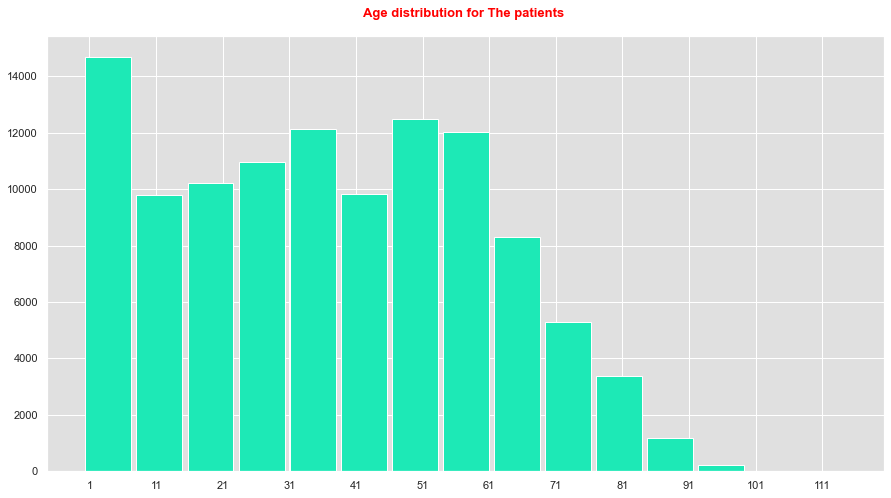

In [47]:
#ploting the histogram for "age" column 

sh.Age.hist(figsize=(15,8), bins=15, grid=True, color='#1de9b6', zorder=2, rwidth=0.9 )

ax = plt.gca()
ax.set_facecolor("#e0e0e0")

# set range for the x-axis for "age" column
plt.xticks(np.arange(start=1, stop=115, step=10)) 

#set title for the histogram for "age" column
plt.title('Age distribution for The patients \n',fontsize = 13, fontweight ='bold',color = "red");

> now we can say that the maximum number of patients are attended between 1 years to 10 years old

In [48]:
#selecting the "age" of the patients & get the mean and make the result integar "who have absent the appointments from "show" column 
#and get the mean for their age
int(sh.Age[sh.show].mean())

57

> the mean age of the patients who shows in thier appointments = "57" years old

In [49]:
#selecting the "age" of the patients & get the mean and make the result integar "who have absent the appointments from "miss" column 
#and get the mean for their age
int(sh.Age[sh.miss].mean())

60

> the mean age of the patients who miss in thier appointments = "57" years old

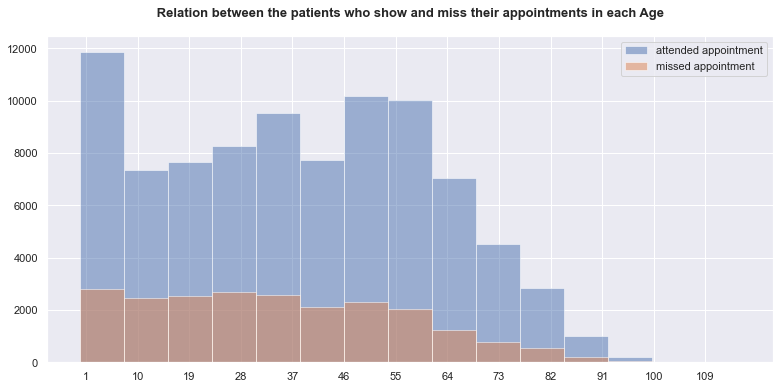

In [50]:
# creating a dataframe "show" to store a column with ONLY True from "show" column (1==True , 0==False)

shows = sh.show == True


# creating a dataframe "miss" to store a column with ONLY True from "miss"  column (1==True , 0==False)

miss = sh.miss == True


#plot histogram 

f, ax = plt.subplots(1, figsize = (13,6))

# assign label and alpha and bins and title
sh.Age[shows].hist(alpha=0.5, bins=15, label='attended appointment')
sh.Age[miss].hist(alpha=0.5, bins=15, label='missed appointment')

# setting title for the histogram
plt.title(' Relation between the patients who show and miss their appointments in each Age \n',fontsize = 13, fontweight ='bold');

# set range for the x-axis
plt.xticks(np.arange(start=1, stop=111, step=9)) 

# plot legend
plt.legend();

> From this last investigation we can now predict that the patinest with the early age (less than 20 years old) and ages from 45 to 55 years old have the hight propabilty to attened their appoimnets than the other ages

<br>






### Which Gender have the highest probability to shows in their appointments ?
<br>

In [51]:
#groupby 'Gender' column by the 'show' column and count the number of shown patients and miss patients 
gender_No_show= sh.groupby('Gender')['show'].value_counts()

#check the result 
gender_No_show

Gender  show
F       1       57246
        0       14594
M       1       30962
        0        7725
Name: show, dtype: int64

the value "1" under the column "show" represent the state of the patient who shows in his appointments and the "0" value represent the patient who miss their appointments.

the data above represent the total number of show and miss appointments in each gender

In [52]:
# filter men who have attended the appointments represented by value "No"
# and those who miss the appoimnet represented by value"yes"
Men_No_show=sh.query('Gender=="M"')['No_show'].value_counts()

#check the dataframe again
Men_No_show

No     30962
Yes     7725
Name: No_show, dtype: int64

In [53]:
# filter females who have attended the appointments represented by value "No"
# and those who miss the appoimnet represented by value"yes"
Female_No_show=sh.query('Gender=="F"')['No_show'].value_counts()

#check the dataframe again
Female_No_show

No     57246
Yes    14594
Name: No_show, dtype: int64

__ let us plot a pie chart to figure out the is the ratio and the percentage of the men who "shows" over who "miss" their  appointments__

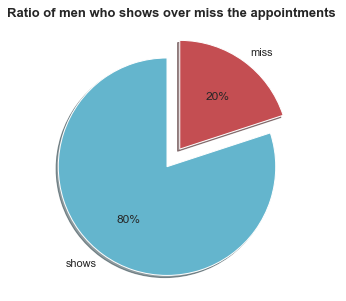

In [54]:
#assigning colours for the plot 
cols = ['c', 'r']    

#figure size
fig = plt.figure(figsize =(5, 5)) 

# plot the title of the pie chart
plt.title('Ratio of men who shows over miss the appointments ',fontsize = 13,fontweight ='bold')

#plot the pie chart with the 'show' and 'miss' data from 'Men_No_show' DataFrame
plt.pie(Men_No_show, labels = ['shows','miss'], colors = cols, startangle = 90, shadow = True, explode = (0.1, 0.1),autopct='%.0f%%');

> we can say that 80% of the men patients has attended thier appointments over 20% of them have missed it 

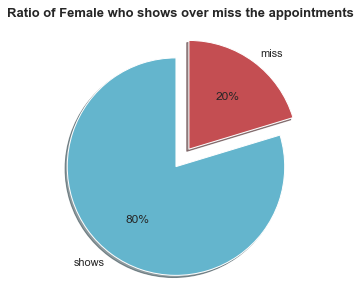

In [55]:
#assigning colours for the plot 
cols = ['c', 'r']  

#figure size
fig = plt.figure(figsize =(5, 5))

# plot the title of the pie chart
plt.title('Ratio of Female who shows over miss the appointments ',fontsize = 13, fontweight ='bold')

# plot the pie chart with the 'show' and 'miss' data from 'Female_No_show' DataFrame
plt.pie(Female_No_show, labels = ['shows','miss'], colors = cols, startangle = 90, shadow = True, explode = (0.1, 0.1),autopct='%.0f%%');

>  we can say that 80 % of the females have attened thier appointments over 20% of them have missed thier appointments

__We noticed here after these investigation that the gender does not effect the prediction for which gender will have the highest possibility to attend because the ratio between men and females are so close__




<br>

<br>

### Which month have the highest  propabilty attending patients ?
<br>

In [56]:
#make a new column 'month' with the number of the month extracted from 'AppointmentDay'
sh_month = sh['AppointmentDay']
sh['month'] = pd.DatetimeIndex(sh['AppointmentDay']).month

#check the result
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  show  \
0             1         0           0        0             0      No     1   
1             0         0           0        0             0      No     1   
2             0         0           0        0             0      No     1   
3             0         0           0        0             0      No     1   
4             1         1           0        0             0      No     1   

   miss  month  
0     0      4  
1     0      4  
2     0      4  
3     0      4  
4     0      4

In [57]:
#make a groupby to select from the data set the count of patients shows in appoimnet coresponding with the number of month
sh_shows=sh.groupby(['month'])['show'].sum()

#check the result 
sh_shows

month
4     2602
5    64037
6    21569
Name: show, dtype: int64

In [58]:
#make a groupby to select from the data set the count of patients shows in appoimnet coresponding with the number of month
sh_miss=sh.groupby(['month'])['miss'].sum()

#check the result 
sh_miss

month
4      633
5    16804
6     4882
Name: miss, dtype: int64

>view over the data for each corresponding months with the missing and attending total number of patients

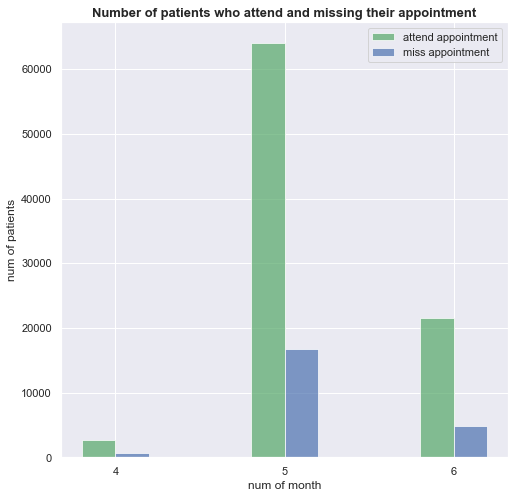

In [59]:
ind = np.arange(len(sh_shows))  # the x locations for the groups
width = 0.2      # the width of the bars
f, ax = plt.subplots(1, figsize = (8,8))
# plot bars
green_bars = plt.bar(ind, sh_shows, width, color='g', alpha=.7, label='attend appointment')
blue_bars = plt.bar(ind + width, sh_miss, width, color='b', alpha=.7, label='miss appointment')


# title and labels
plt.ylabel('num of patients')
plt.xlabel('num of month')
plt.title('Number of patients who attend and missing their appointment',fontsize = 13, fontweight ='bold')
locations = ind + width / 2  
labels = sh_shows.index 
plt.xticks(locations, labels)

# legend
plt.legend();

> the "May" month have the highest total number of patients who have attended their appointments and also have the highest missing appointments

<br>

### Which day have the highest  propabilty attending patients ?
<br>

In [60]:
#make a new column 'day' with the name of the day extracted from 'AppointmentDay'
sh_day = sh['AppointmentDay']
sh['day'] = pd.to_datetime(sh['AppointmentDay']).dt.day_name()

#check that the columnn day have been created
sh.head()

Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handcap  SMS_received No_show  show  \
0             1         0           0        0             0      No     1   
1             0         0           0        0             0      No     1   
2             0         0           0        0             0      No     1   
3             0         0           0        0             0      No     1   
4             1         1           0        0             0      No     1   

   miss  month     day  
0     0      4  Friday  
1     0      4  Friday  
2     0      4  Friday  
3     0      4  Friday  
4     0      4  Friday

>Next step we will have the total number of the patients who have attended their appointments in each day of the week

In [61]:
#make a groupby to select from the data set the count of patients shows in appoimnet over the days of the week 
sh_days_shows=sh.groupby(['day'])['show'].sum()

#show total number in each day
sh_days_shows.head()

day
Friday      14982
Monday      18025
Saturday       30
Thursday    13909
Tuesday     20488
Name: show, dtype: int64

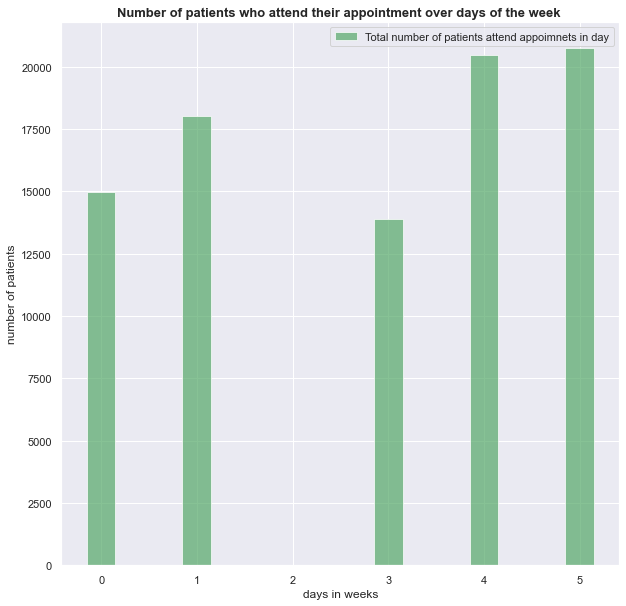

In [62]:
#plot a bar chart showing the Total number of patients who attend appoimnets in each day
ind = np.arange(len(sh_days_shows))  
width = 0.3     
f, ax = plt.subplots(1, figsize = (10,10))
# plot bars
blue_bars = plt.bar(ind, sh_days_shows, width, color='g', alpha=.7, label='Total number of patients attend appoimnets in day')
# title and labels
plt.ylabel('number of patients')
plt.xlabel('days in weeks')
plt.title('Number of patients who attend their appointment over days of the week ',fontsize = 13, fontweight ='bold')
locations =ind + (width / 2) 
# legend
plt.legend();

> from this graph we can figure out that both "Tuesday" & " Wednesday" have the highest attending patients  with comparing for all the week

<br>

### Which Neighbourhood have the highest probability to shows in their appointments ?
<br>

The next step is to creat a new DataFrame wich contain each Neighbourhood that have listed in our dataset and the total number of __shown__ patients in each Neighbourhood

In [63]:
# assign a new DataFrame which consist of the "Neighbourhood" column
# and the sum number of the patients who attend thier appointments 
sh_Neighbourhood_shows=sh.groupby(['Neighbourhood'])['show'].sum()

#creat a DataFrame
sh_Neighbourhood_shows=pd.DataFrame(sh_Neighbourhood_shows)

# sort the by the hightes value of the show column 
sh_Neighbourhood_shows=sh_Neighbourhood_shows.sort_values("show", ascending=False)

#check the ouput 
sh_Neighbourhood_shows

show
Neighbourhood                    
JARDIM CAMBURI               6252
MARIA ORTIZ                  4586
RESISTÊNCIA                  3525
JARDIM DA PENHA              3246
SANTA MARTHA                 2635
...                           ...
ILHA DO BOI                    32
ILHA DO FRADE                   8
AEROPORTO                       7
PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     0

[81 rows x 1 columns]

>ploting our dataFame with a bar chart, representing the Y-axis as the Neighbourhood list and the X-axis for the total count of the patients who have __attended the appointments__

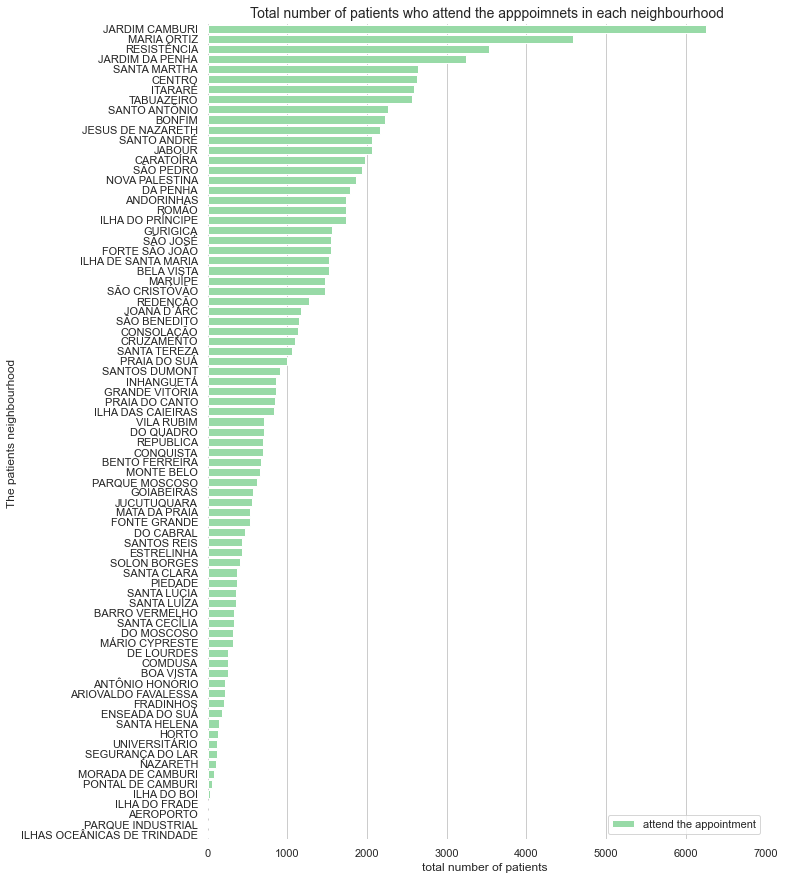

In [67]:
# set the backgroun colour and grid:
sns.set_style("whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))
# Plot the patients that attend the appointment by sorting from the high values to the min 
sns.set_color_codes("pastel")
sns.barplot(x='show', y= sh_Neighbourhood_shows.index, data=sh_Neighbourhood_shows,label="attend the appointment", color="g")
# Add a legend and informative axis label and title
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000), ylabel="The patients neighbourhood ",xlabel="total number of patients ")
ax.set_title("Total number of patients who attend the apppoimnets in each neighbourhood",fontsize=14)
sns.despine(left=True, bottom=True)

> from this graph we can have a great notice that the highest patients __attend thier appointments__ is "JARDIM CAMBURI"

__function to find the value counts percentage and plot barplot figure__ "Hypertension","Diabetes","Alcoholism","Handcap","SMS_received"

In [68]:
# function to find the value counts percentage and plot barplot figure
def percent_and_barplot(col):
    print(round(sh[col].value_counts()/len(sh)*100,2))
    sh[col].value_counts().plot(kind="bar", color='g', alpha=.7)
    plt.ylabel("total records")
    plt.title(col); 

0    90.17
1     9.83
Name: Scholarship, dtype: float64


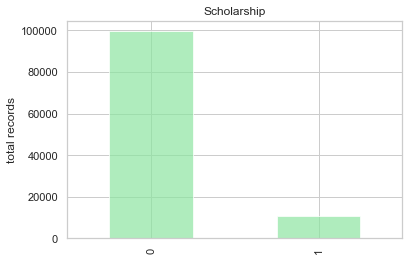

In [69]:
#find the value counts percentage "Scholarship"
percent_and_barplot('Scholarship')

0    80.28
1    19.72
Name: Hypertension, dtype: float64


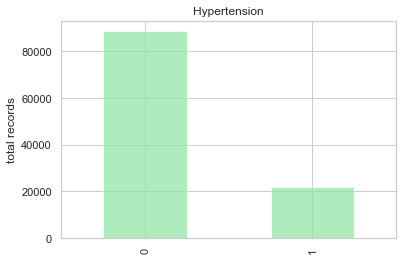

In [71]:
#find the value counts percentage "Hypertension"
percent_and_barplot('Hypertension')

0    92.81
1     7.19
Name: Diabetes, dtype: float64


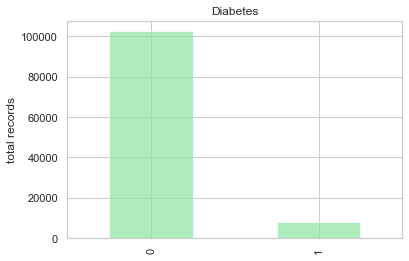

In [72]:
#find the value counts percentage "Diabetes"
percent_and_barplot('Diabetes')

0    96.96
1     3.04
Name: Alcoholism, dtype: float64


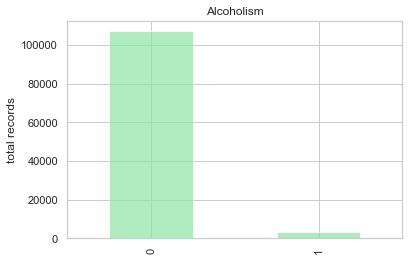

In [73]:
#find the value counts percentage "Alcoholism"
percent_and_barplot('Alcoholism')

0    97.97
1     1.85
2     0.17
3     0.01
4     0.00
Name: Handcap, dtype: float64


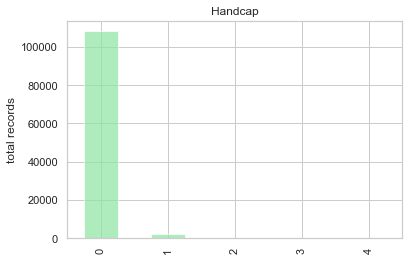

In [74]:
#find the value counts percentage "Handcap"
percent_and_barplot('Handcap')

0    67.9
1    32.1
Name: SMS_received, dtype: float64


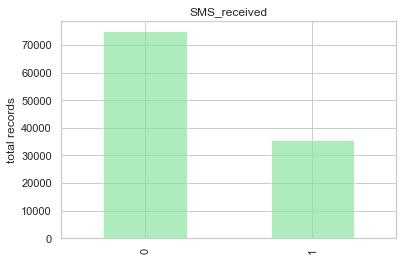

In [75]:
#find the value counts percentage "SMS_received"
percent_and_barplot('SMS_received')

<a id='conclusions'></a>
## Conclusions

>For summarizing our investigation, we can answer our main question "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? " with the results we get so far:
- the ages from 45 to 55 years old and the ages below 10 years old have the hight chance to attend their appoimnets more than the the other ages
- the gender dont matter in this data set beacuse they have the same propabilty in attending and missing appoimnets
- "May" have the hight prediction that the patients will commit to their scheduled appointment
- "Tuesday" is the day which we will have a commitment from patients to more show up than missing appointments
- the Neighbourhoods "JARDIM CAMBURI" have hight chance that pateints will show

---
<a id='lim'></a>
## limitations
- the data set is only for 2016 which can varry alot from our present year (2023) beacuse the tecnology gap and for sure the the health knowledge for the peoples in barzil which it get better and better each year and that incourage them to get to more attending for asking help from doctors and min the missing appointments